## Import Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
#importing data
data = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [4]:
data['House price of unit area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: House price of unit area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

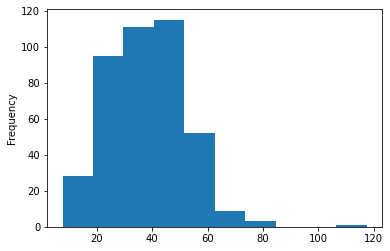

In [5]:
data['House price of unit area'].plot.hist()

# EDA

* **In House price of unit area** has some **outliers** are present and is skewed to the left. so it is necessary to remove these outliers from the dataset.

## Remove Outliers

In [6]:
# checking quantiles
q1 = data['House price of unit area'].quantile(0.25)
q3 = data['House price of unit area'].quantile(0.75)
q1, q3

(27.7, 46.6)

In [7]:
#calculating iqr
iqr = q3 - q1
iqr

18.900000000000002

In [8]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(74.95, -0.6500000000000021)

In [9]:
# imputing outliers
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [10]:
data['House price of unit area'] = data['House price of unit area'].apply(limit_imputer)

In [11]:
data['House price of unit area'].describe()

count    414.000000
mean      37.861957
std       13.112035
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max       74.950000
Name: House price of unit area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

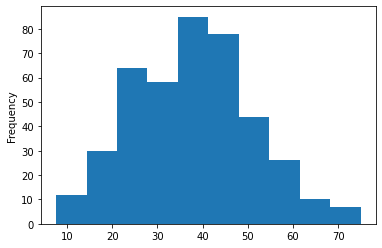

In [12]:
data['House price of unit area'].plot.hist()

In [13]:
#checking missing values
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

## datetime data type

In [14]:
# Convert to "Transaction date" to in proper datetime format.
data['Transaction date']=pd.to_datetime(data['Transaction date'],unit='D',origin='1990-01-01')

In [15]:
#manipulating datetime variable
data['Purchase Year'] = pd.DatetimeIndex(data['Transaction date']).year

In [16]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Purchase Year
0,1995-07-06 22:00:00.002879872,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,1995
1,1995-07-06 22:00:00.002879872,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,1995
2,1995-07-07 13:59:59.997120128,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,1995
3,1995-07-07 12:00:00.000000000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,1995
4,1995-07-06 19:59:59.997120128,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,1995


## Variable Identification and typecasting

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Transaction date                          414 non-null    datetime64[ns]
 1   House Age                                 414 non-null    float64       
 2   Distance from nearest Metro station (km)  414 non-null    float64       
 3   Number of convenience stores              414 non-null    int64         
 4   latitude                                  414 non-null    float64       
 5   longitude                                 414 non-null    float64       
 6   Number of bedrooms                        414 non-null    int64         
 7   House size (sqft)                         414 non-null    int64         
 8   House price of unit area                  414 non-null    float64       
 9   Purchase Year                   

## Integer datatypes 

In [18]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

Number of convenience stores    int64
Number of bedrooms              int64
House size (sqft)               int64
Purchase Year                   int64
dtype: object

 * **Number of convenience stores**  represents different Number of stores, therefore it should be convereted to **category**.
 * **Number of bedrooms** represents Number of bedrooms in the House, therefore it should be converted to **category**

In [19]:
data['Number of convenience stores']=data['Number of convenience stores'].astype('category')

data['Number of bedrooms']=data['Number of bedrooms'].astype('category')

## Float datatypes 

In [20]:
data.dtypes[data.dtypes == 'float64']

House Age                                   float64
Distance from nearest Metro station (km)    float64
latitude                                    float64
longitude                                   float64
House price of unit area                    float64
dtype: object

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Transaction date                          414 non-null    datetime64[ns]
 1   House Age                                 414 non-null    float64       
 2   Distance from nearest Metro station (km)  414 non-null    float64       
 3   Number of convenience stores              414 non-null    category      
 4   latitude                                  414 non-null    float64       
 5   longitude                                 414 non-null    float64       
 6   Number of bedrooms                        414 non-null    category      
 7   House size (sqft)                         414 non-null    int64         
 8   House price of unit area                  414 non-null    float64       
 9   Purchase Year                   

## Visualizing correlations 

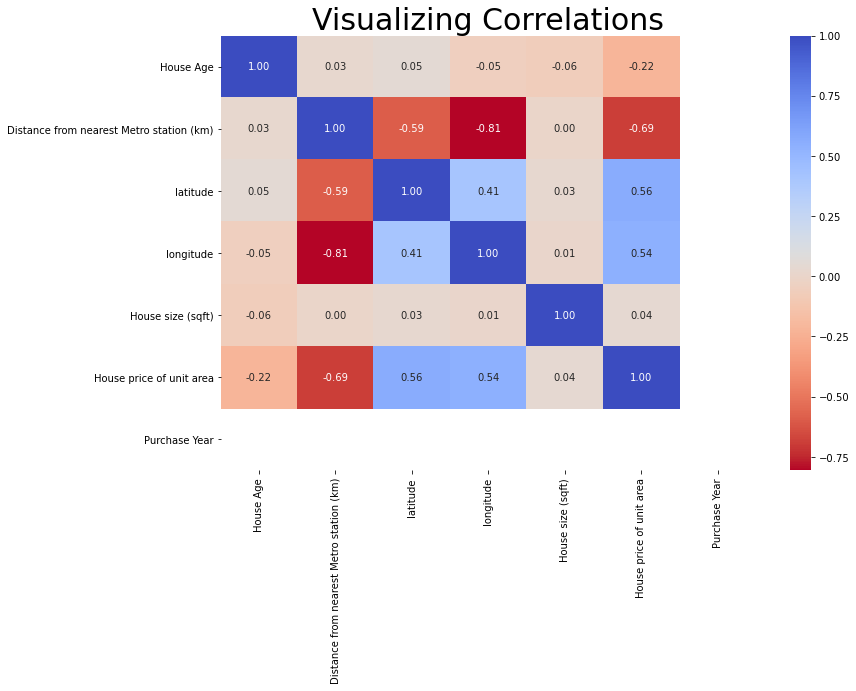

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm_r',fmt='.2f')
plt.title("Visualizing Correlations", size = 30)
plt.show()

## Categorical variable vs target variable

<AxesSubplot:xlabel='Number of bedrooms'>

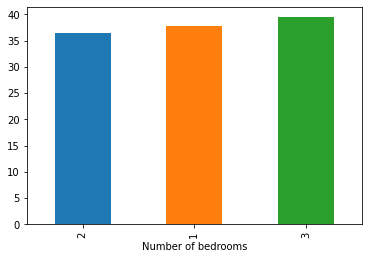

In [23]:
 data.groupby('Number of bedrooms')['House price of unit area'].mean().sort_values().plot(kind = 'bar',color=['C0','C1','C2','C3'])

<AxesSubplot:xlabel='Number of convenience stores'>

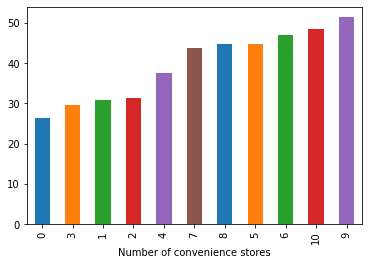

In [24]:
 data.groupby('Number of convenience stores')['House price of unit area'].mean().sort_values().plot(kind = 'bar',color=['C0','C1','C2','C3','C4','C5'])

In [25]:
# These variable doesn't help in model prediction, therefore it drop from the dataset.
# dropping redundant variables
data.drop( columns = ['Transaction date','Purchase Year'], inplace = True)

In [26]:
data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## Segregating variables: Independent and Dependent Variables

In [27]:
data.dropna(inplace=True)
X = data.drop(columns=['House price of unit area'])
Y = data['House price of unit area']

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   House Age                                 414 non-null    float64 
 1   Distance from nearest Metro station (km)  414 non-null    float64 
 2   Number of convenience stores              414 non-null    category
 3   latitude                                  414 non-null    float64 
 4   longitude                                 414 non-null    float64 
 5   Number of bedrooms                        414 non-null    category
 6   House size (sqft)                         414 non-null    int64   
 7   House price of unit area                  414 non-null    float64 
dtypes: category(2), float64(5), int64(1)
memory usage: 24.0 KB


<AxesSubplot:ylabel='Frequency'>

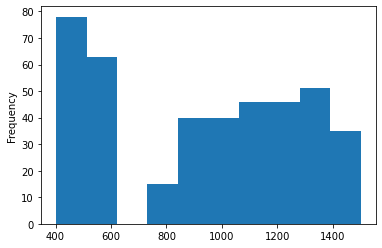

In [29]:
data['House size (sqft)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

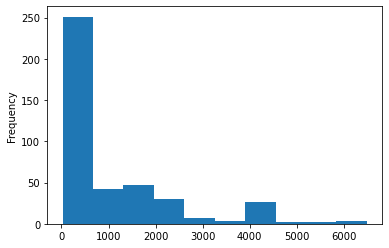

In [30]:
data['Distance from nearest Metro station (km)'].plot.hist()

# Scaling the dataset

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['House price of unit area']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960


# Checking and Removing Multicollinearity

In [32]:
X.corr()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322
Number of bedrooms,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276
House size (sqft),-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000


In [33]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['Number of bedrooms', 'House size (sqft)'],
  ['House size (sqft)', 'Number of bedrooms']],
 2)

In [34]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

House Age                                   1.022479
Distance from nearest Metro station (km)    4.308998
Number of convenience stores                1.617328
latitude                                    1.602561
longitude                                   2.926037
Number of bedrooms                          2.326443
House size (sqft)                           2.338321
dtype: float64

In [35]:
X = vif_data[:]

In [36]:
Y = data['House price of unit area']

# Splitting the data into train set and the test set

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((289, 7), (125, 7), (289,), (125,))

# Mode Building 

# 1. Linear Regression

* **Linear Regression** model's main aim is to find the best fit linear line and the optimal values of intercept and coefficients such that the error is minimized.
* Error is the difference between the **actual value** and **predicted value** and the goal is to reduce this difference.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [39]:
# Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent
# variable.
lr.coef_

array([-3.10087255, -4.45085177,  3.89089977,  3.04997689,  0.94022696,
       -0.21537689,  0.18325861])

In [40]:
predictions = lr.predict(x_test)

In [41]:
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, predictions))
print("The Root Mean Squared Error for Linear Regression is:", rmse_lin_reg)
print("Linear Regression Score is:", lr.score(x_test, y_test) * 100, "%")

The Root Mean Squared Error for Linear Regression is: 7.0374904126359334
Linear Regression Score is: 62.5867581568885 %


# 2. Ridge Regression

* **Ridge Regression** (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization    term equal to αΣi = 1n θi2 is added to the cost function.
* This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# What is GridSearchCV ?
# It is a library function that helps you loop through pre-defined hyperparameters and fits your model with the best ones.

# Advantage
# GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination
# using the Cross-Validation method.


# Ridge Regression
# Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.


ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
grid_search_ridge = GridSearchCV(ridge, param_grid, cv = 5)
grid_search_ridge.fit(x_train, y_train)
y_prediction = grid_search_ridge.predict(x_test)
rmse_ridge_reg = np.sqrt(mean_squared_error(y_test, y_prediction))
print("The Root Mean Squared Error for Ridge Regression is:", rmse_ridge_reg)
print("Ridge Regression Score is:", grid_search_ridge.score(x_test, y_test) * 100, "%")

The Root Mean Squared Error for Ridge Regression is: 7.0519057237890586
Ridge Regression Score is: 62.433329631939436 %


# 3. Lasso Regression 

* **Least Absolute Shrinkage and Selection Operator Regression** (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, **it adds a regularization term to the cost function**, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

* It is a regression analysis method that performs both variable selection and regularization in order to enhance the **prediction accuracy** and **interpretability** of the resulting statistical model.

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
grid_search_las = GridSearchCV(lasso, param_grid, cv = 5)
grid_search_las.fit(x_train, y_train)
y_preddiction = grid_search_las.predict(x_test)
rmse_las_reg = np.sqrt(mean_squared_error(y_test, y_prediction))
print("The Root Mean Squared Error for Lasso Regression is:", rmse_las_reg)
print("Lasso Regression Score is:", grid_search_las.score(x_test, y_test) * 100, "%")

The Root Mean Squared Error for Lasso Regression is: 7.0519057237890586
Lasso Regression Score is: 63.00942262984124 %


# 4. Elastic Net

* **Elastic Net** is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression. Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training.

In [44]:
from sklearn.linear_model import ElasticNet

el_net = ElasticNet()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
             'l1_ratio': np.arange(0.0, 1.0, 0.1)}
grid_search_el_net = GridSearchCV(el_net, param_grid, cv = 5)
grid_search_el_net.fit(x_train, y_train)
y_prediction = grid_search_el_net.predict(x_test)
rmse_el_net = np.sqrt(mean_squared_error(y_test, y_prediction))
print("The Root Mean Squared Error for Elastic Net is:", rmse_el_net)
print("Elastic Net Score is:", grid_search_el_net.score(x_test, y_test) * 100, "%")

The Root Mean Squared Error for Elastic Net is: 7.0220057284526955
Elastic Net Score is: 62.75121873702511 %


# 5. Support Vector Regression

* **Support vector regression** is a supervised machine learning algorithm. The basic idea behind SVR is to find the best fit line.It gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line ( or hyperplane in higher dimensions) to fit the data.

In [45]:
from sklearn.svm import SVR

svr = SVR()
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'gamma': ['scale', 'auto'],
              'C': [1, 10, 100],
              'epsilon': [0.01, 0.1, 1, 10]}
grid_search_svr = GridSearchCV(svr, param_grid, cv = 5)
grid_search_svr.fit(x_train, y_train)
y_prediction = grid_search_svr.predict(x_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_prediction))
print("The Root Mean Squared Error for Support Vector Regressor is:", rmse_svr)
print("SVR Score is:", grid_search_svr.score(x_test, y_test) * 100, "%")

The Root Mean Squared Error for Support Vector Regressor is: 5.940301031354078
SVR Score is: 73.34328574270373 %


# 6. Decision Tree Regression

* **Decision Tree Regression** is a supervised machine learning algorithm. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. 
* **Decision trees regressors** normally use mean squared error (MSE) to decide to split a node in two or more sub-nodes.

In [46]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 0)
param_grid = {'max_depth': list(range(2, 10)),
              'splitter': ['best', 'random'],
              'min_samples_leaf': list(range(1, 10)),
              'max_leaf_nodes': list(range(5, 20))}
grid_search_dtr = GridSearchCV(dtr, param_grid, cv = 5)
grid_search_dtr.fit(x_train, y_train)
y_prediction = grid_search_dtr.predict(x_test)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_prediction))
print("The Root Mean Squared Error for Decision Tree Regressor is:", rmse_dtr)
print("DTR score is:", grid_search_dtr.score(x_test, y_test) * 100, "%")
print("The best parameters of the decision tree regressor are:")
print(grid_search_dtr.best_params_)

The Root Mean Squared Error for Decision Tree Regressor is: 6.1132377915897695
DTR score is: 71.76860832767764 %
The best parameters of the decision tree regressor are:
{'max_depth': 4, 'max_leaf_nodes': 13, 'min_samples_leaf': 5, 'splitter': 'best'}


# 7. Random Forest Regressor

* **Random Forest Regressor** algorithm combines ensemble learning methods with the decision tree framework to create multiple  randomly drawn  decision trees from the data, averaging the results to output a new result that often leads to strong predictions.

In [47]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
param_grid = {'n_estimators': list(range(100, 200, 10)),
             'max_depth': list(range(4, 7)),
             'min_samples_split': list(range(2, 4))}
grid_search_rfr = GridSearchCV(rfr, param_grid, cv = 5)
grid_search_rfr.fit(x_train, y_train)
y_prediction = grid_search_rfr.predict(x_test)
rmse_rfr_grid = np.sqrt(mean_squared_error(y_test, y_prediction))
print("The Root Mean Squared Error is:", rmse_rfr_grid)
print("RFR Score is:", grid_search_rfr.score(x_test, y_test) * 100, "%")

The Root Mean Squared Error is: 5.595585925692195
RFR Score is: 76.34729326206642 %


# 8. AdaBoost Regressor

 * **AdaBoost regressor** is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [48]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(random_state = 0)
param_grid = {'n_estimators': list(range(100, 1000, 100)),
             'learning_rate': [0.001, 0.01, 0.1, 1, 10]}
grid_search_abr = GridSearchCV(abr, param_grid, cv = 5)
grid_search_abr.fit(x_train, y_train)
y_prediction = grid_search_abr.predict(x_test)
rmse_abr_grid = np.sqrt(mean_squared_error(y_test, y_prediction))
print("The Root Mean Squared Error is:", rmse_abr_grid)
print("ABR Score is:", grid_search_abr.score(x_test, y_test) * 100, "%")

The Root Mean Squared Error is: 5.764191288855159
ABR Score is: 74.90041861086816 %


# 9. XGBRegressor

* **XGBBoost Regressor** is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It is a powerful approch for building supervised regression models. The validity of this statement can be inferred by knowing about its(XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the differenc between actual values and predicted values, i.e how far the model results are from the real values. 

In [49]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
param_grid = {'n_estimators': list(range(500, 1000, 100)),
             'learning_rate': [0.001, 0.01, 0.1]}
grid_search_xgb = GridSearchCV(xgb, param_grid, cv = 5)
grid_search_xgb.fit(x_train, y_train)
y_prediction = grid_search_xgb.predict(x_test)
rmse_xgb_grid = np.sqrt(mean_squared_error(y_test, y_prediction))
print("The Root Mean Squared Error is:", rmse_xgb_grid)
print("XGB Score is:", grid_search_xgb.score(x_test, y_test) * 100, "%")

The Root Mean Squared Error is: 5.9379549348046625
XGB Score is: 73.36433749587502 %


# Representation of Model performance

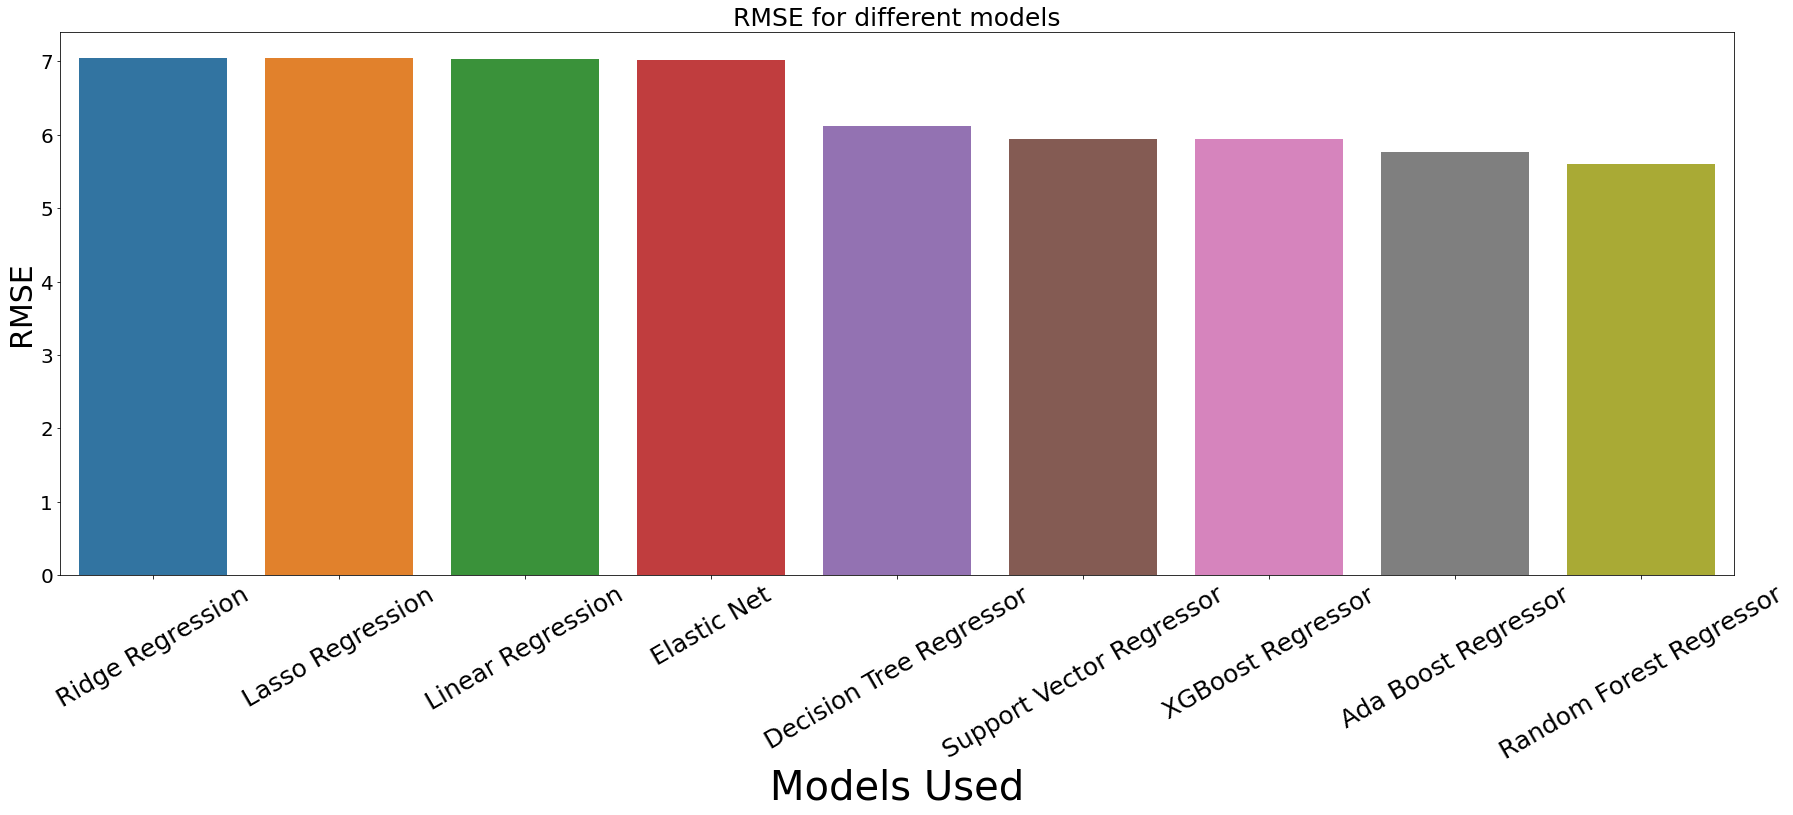

In [50]:
data = {'Linear Regression': rmse_lin_reg, 'Ridge Regression': rmse_ridge_reg, 'Lasso Regression': rmse_las_reg, 'Elastic Net': rmse_el_net,
        'Support Vector Regressor': rmse_svr, 'Decision Tree Regressor': rmse_dtr, 'Random Forest Regressor': rmse_rfr_grid,
        'Ada Boost Regressor': rmse_abr_grid, 'XGBoost Regressor': rmse_xgb_grid}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
RMSE = list(data.values())
fig = plt.figure(figsize = (30, 10))
sns.barplot(x = models, y = RMSE)
plt.xlabel("Models Used", size = 40)
plt.xticks(rotation = 30, size = 25)
plt.ylabel("RMSE", size = 30)
plt.yticks(size = 20)
plt.title("RMSE for different models", size = 25)
plt.show()

* In this housing price we try different models to check which model has less **Root Mean Squared Error**, From all of this model's **Random Forest Regressor** has less RMSE and it gives approx **76% score**,therefore **Random Forest Regressor** Model is best fit for this housing price model.

# Model Coefficients 

In [52]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


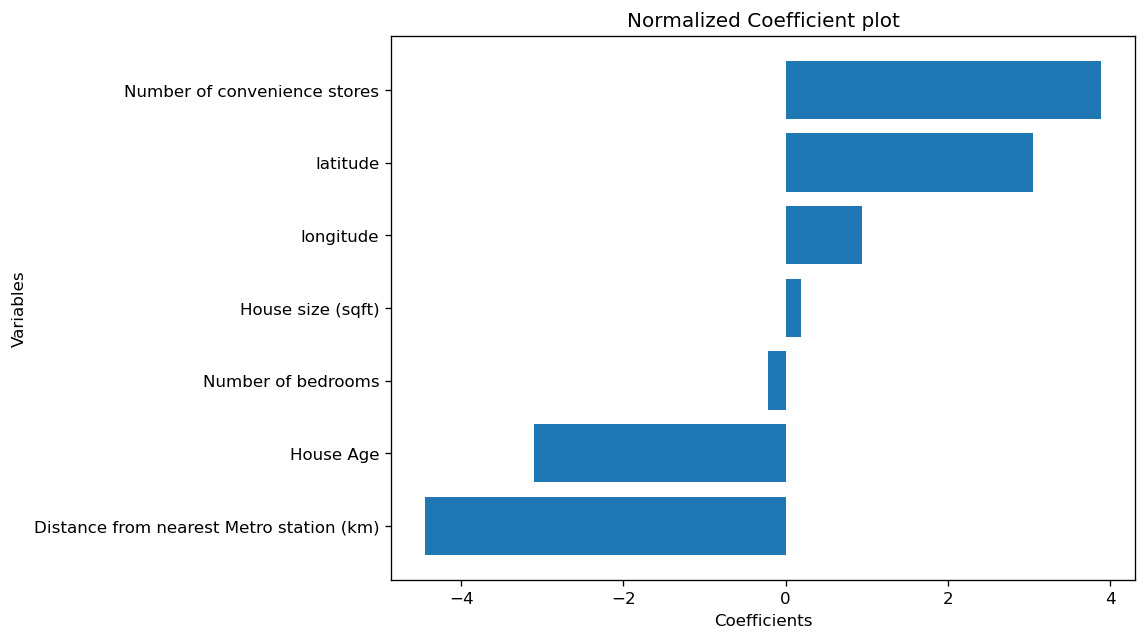

In [53]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

# Conclusion

* conclusion:
     * From this Housing Data Model we conclude that if the House is far away from the Metro station and the House age is old then the price of house is decrease. If the Number of convenience stores are high then the price of house is increase.